In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
uploaded = files.upload()  # Select and upload the dataset ZIP file

Saving ipl_data.zip to ipl_data.zip


In [4]:
import zipfile

# Define the zip file name
zip_file = "ipl_data.zip"

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("ipl_data")  # Extracts to a new folder 'ipl_data'

print("Extraction complete!")
import os

# Check extracted files
extracted_files = os.listdir("ipl_data")
print("Extracted Files:", extracted_files)

Extraction complete!
Extracted Files: ['matches.csv', 'deliveries.csv']


In [5]:
matches = pd.read_csv("ipl_data/matches.csv")
deliveries = pd.read_csv("ipl_data/deliveries.csv")

In [6]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
deliveries.shape

(260920, 17)

In [9]:
total_score = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [10]:
total_score

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [11]:
total_score = total_score[total_score['inning']==1]

In [12]:
total_score

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [13]:
matches_df = matches.merge(total_score[['match_id','total_runs']],left_on='id',right_on='match_id')

In [14]:
matches_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [15]:
matches_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [16]:
teams = [ 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Chennai Super Kings',
        'Sunrisers Hyderabad',
        'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru']

In [17]:
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')

matches_df["team2"]=matches_df["team2"].str.replace("Delhi Daredevils","Delhi Capitals")
matches_df["team1"]=matches_df["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches_df["team2"]=matches_df["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches_df["team1"]=matches_df["team1"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches_df["team2"]=matches_df["team2"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches_df["team1"]=matches_df["team1"].str.replace("Kings XI Punjab","Punjab Kings")
matches_df["team2"]=matches_df["team2"].str.replace("Kings XI Punjab","Punjab Kings")
matches_df["team1"]=matches_df["team1"].str.replace("Rising Pune Supergiantsss","Rising Pune Supergiants")
matches_df["team2"]=matches_df["team2"].str.replace("Rising Pune Supergiantsss","Rising Pune Supergiants")
matches_df["team1"]=matches_df["team1"].str.replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches_df["team2"]=matches_df["team2"].str.replace("Rising Pune Supergiant","Rising Pune Supergiants")

matches_df["team1"]=matches_df["team1"].str.replace("Rising Pune Supergiantss","Rising Pune Supergiants")
matches_df["team2"]=matches_df["team2"].str.replace("Rising Pune Supergiantss","Rising Pune Supergiants")

matches_df["team1"]=matches_df["team1"].str.replace("Rising Pune Supergiants","Rising Pune Supergiants")
matches_df["team2"]=matches_df["team2"].str.replace("Rising Pune Supergiants","Rising Pune Supergiants")

In [18]:
unique_teams = set(matches_df["team1"].unique()).union(set(matches_df["team2"].unique()))
print(unique_teams)


{'Kochi Tuskers Kerala', 'Gujarat Lions', 'Rising Pune Supergiants', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Royal Challengers Bengaluru', 'Punjab Kings', 'Gujarat Titans', 'Kolkata Knight Riders', 'Delhi Capitals', 'Pune Warriors', 'Lucknow Super Giants', 'Mumbai Indians', 'Chennai Super Kings'}


In [19]:
matches_df = matches_df[matches_df['team1'].isin(teams)]
matches_df = matches_df[matches_df['team2'].isin(teams)]

In [20]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [21]:
matches_df['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [22]:
matches_df['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [23]:
matches_df.shape

(980, 22)

In [24]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')

In [25]:
matches_df = matches_df[['match_id','city','winner','total_runs']]

In [26]:
matches_df.head()

,match_id,city,winner,total_runs
0,335982,Bangalore,Kolkata Knight Riders,222
1,335983,Chandigarh,Chennai Super Kings,240
2,335984,Delhi,Delhi Daredevils,129
3,335985,Mumbai,Royal Challengers Bangalore,165
4,335986,Kolkata,Kolkata Knight Riders,110


In [27]:
deliveries_df = matches_df.merge(deliveries,on='match_id')

In [28]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [29]:
deliveries_df = deliveries_df[deliveries_df['inning']==2]

In [30]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN


In [31]:
deliveries_df['total_runs_y'] = deliveries_df['total_runs_y'].astype(int)

In [32]:
deliveries_df.groupby(['match_id'])['total_runs_y'].cumsum()

,total_runs_y
124,1
125,2
126,2
127,3
128,4
...,...
233896,110
233897,111
233898,112
233899,113


In [33]:
deliveries_df['current_run'] = deliveries_df.groupby(['match_id'])['total_runs_y'].cumsum()

In [34]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_run
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [35]:
deliveries_df['runs_left'] = deliveries_df['total_runs_x'] - deliveries_df['current_run']

In [36]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_run,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218


In [37]:
deliveries_df['balls_left'] = 120 - (deliveries_df['over']*6 + deliveries_df['ball'])

In [38]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_run,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,115


In [39]:
deliveries_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder',
       'current_run', 'runs_left', 'balls_left'],
      dtype='object')

In [40]:
deliveries_df['is_wicket'].dtype

dtype('int64')

In [41]:
deliveries_df["wickets_left"]= 10 - deliveries_df.groupby(["match_id"])["is_wicket"].cumsum()

In [42]:
deliveries_df.head(100)


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_run,runs_left,balls_left,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,NaN,NaN,NaN,1,221,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,NaN,NaN,NaN,2,220,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,NaN,NaN,NaN,2,220,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,NaN,NaN,NaN,3,219,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,NaN,NaN,NaN,4,218,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,4,SB Joshi,...,1,NaN,0,NaN,NaN,NaN,79,143,32,1
220,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,5,P Kumar,...,1,legbyes,0,NaN,NaN,NaN,80,142,31,1
221,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,6,SB Joshi,...,1,NaN,0,NaN,NaN,NaN,81,141,30,1
222,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,7,P Kumar,...,0,NaN,0,NaN,NaN,NaN,81,141,29,1


In [43]:
deliveries_df['crr'] = (deliveries_df['current_run']/(120-deliveries_df['balls_left']))*6

In [44]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_run,runs_left,balls_left,wickets_left,crr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,NaN,NaN,NaN,1,221,119,10,6.0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,NaN,NaN,NaN,2,220,118,10,6.0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,NaN,NaN,NaN,2,220,117,10,4.0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,NaN,NaN,NaN,3,219,116,10,4.5
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,NaN,NaN,NaN,4,218,115,10,4.8


In [45]:
deliveries_df['rr'] = (deliveries_df['runs_left']/deliveries_df['balls_left'])*6


In [46]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_run,runs_left,balls_left,wickets_left,crr,rr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,NaN,1,221,119,10,6.0,11.142857
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,NaN,2,220,118,10,6.0,11.186441
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,NaN,2,220,117,10,4.0,11.282051
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,NaN,3,219,116,10,4.5,11.327586
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,NaN,4,218,115,10,4.8,11.373913


In [47]:
def result(row):
  return 1 if row['batting_team']== row['winner'] else 0

In [48]:
deliveries_df['result'] = deliveries_df.apply(result,axis=1)

In [49]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_run,runs_left,balls_left,wickets_left,crr,rr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,NaN,1,221,119,10,6.0,11.142857,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,NaN,2,220,118,10,6.0,11.186441,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,NaN,2,220,117,10,4.0,11.282051,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,NaN,3,219,116,10,4.5,11.327586,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,NaN,4,218,115,10,4.8,11.373913,0


In [50]:
final_df= deliveries_df[["batting_team","bowling_team","city","runs_left","balls_left","wickets_left","total_runs_x","crr","rr","result"]]

In [51]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,222,6.0,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.0,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,222,4.0,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,222,4.5,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,222,4.8,11.373913,0


In [52]:
final_df.dropna(inplace=True)

<ipython-input-52-3665e38311c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [53]:
final_df=final_df[final_df["balls_left"]!=0]

In [54]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,222,6.0,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.0,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,222,4.0,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,222,4.5,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,222,4.8,11.373913,0


In [55]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,222,6.000000,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.000000,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,222,4.000000,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,222,4.500000,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,222,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...
233896,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,61,8,113,11.186441,0.295082,1
233897,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,60,8,113,11.100000,0.200000,1
233898,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,59,8,113,11.016393,0.101695,1
233899,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,0,58,8,113,10.935484,0.000000,1


In [56]:
import pandas as pd

# Save the DataFrame as an Excel file
final_df.to_excel("raw_ipl_data.xlsx", index=False)

# Download the file (for Google Colab)
from google.colab import files
files.download("raw_ipl_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
batting = final_df['batting_team']
bowling = final_df['bowling_team']
city = final_df['city']

In [58]:
batting

,batting_team
124,Royal Challengers Bangalore
125,Royal Challengers Bangalore
126,Royal Challengers Bangalore
127,Royal Challengers Bangalore
128,Royal Challengers Bangalore
...,...
233896,Kolkata Knight Riders
233897,Kolkata Knight Riders
233898,Kolkata Knight Riders
233899,Kolkata Knight Riders


In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [60]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store label encoders for each column
label_encoders = {}

# Identify categorical columns
categorical_cols = final_df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column and save the encoder
for col in categorical_cols:
    encoder = LabelEncoder()
    final_df[col] = encoder.fit_transform(final_df[col])
    label_encoders[col] = encoder  # Save the encoder

# Now, 'label_encoders' contains the fitted LabelEncoder for each categorical column


In [61]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
124,11,6,2,221,119,10,222,6.0,11.142857,0
125,11,6,2,220,118,10,222,6.0,11.186441,0
126,11,6,2,220,117,10,222,4.0,11.282051,0
127,11,6,2,219,116,10,222,4.5,11.327586,0
128,11,6,2,218,115,10,222,4.8,11.373913,0


In [62]:
import pandas as pd

# Save the DataFrame as an Excel file
final_df.to_excel("preprocessed_ipl_data.xlsx", index=False)

# Download the file (for Google Colab)
from google.colab import files
files.download("preprocessed_ipl_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
X = final_df.iloc[:,:-1]
y= final_df.iloc[:,-1]

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler to numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [65]:
import pickle
pickle.dump(scaler, open("scaler.pkl",'wb'))

In [66]:
X.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr
124,0.846154,0.461538,0.0625,0.784768,1.000000,1.0,0.711111,0.166667,0.427868
125,0.846154,0.461538,0.0625,0.781457,0.991803,1.0,0.711111,0.166667,0.427903
126,0.846154,0.461538,0.0625,0.781457,0.983607,1.0,0.711111,0.111111,0.427982
127,0.846154,0.461538,0.0625,0.778146,0.975410,1.0,0.711111,0.125000,0.428019
128,0.846154,0.461538,0.0625,0.774834,0.967213,1.0,0.711111,0.133333,0.428057


In [67]:
y.head()

,result
124,0
125,0
126,0
127,0
128,0


In [68]:
import pandas as pd

# Combine X and y
combined_df = X.copy()
combined_df['result'] = y

# Save to Excel
file_path = "combined_data.xlsx"
combined_df.to_excel(file_path, index=False)

print("File saved successfully!")
from google.colab import files
files.download(file_path)



File saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
batting1 = X['batting_team']
bowling1 = X['bowling_team']
city1 = X['city']

In [70]:
data = {
    '1': batting,
    '2': batting1,

}

df1 = pd.DataFrame(data)

print(df1)

                                  1         2
124     Royal Challengers Bangalore  0.846154
125     Royal Challengers Bangalore  0.846154
126     Royal Challengers Bangalore  0.846154
127     Royal Challengers Bangalore  0.846154
128     Royal Challengers Bangalore  0.846154
...                             ...       ...
233896        Kolkata Knight Riders  0.461538
233897        Kolkata Knight Riders  0.461538
233898        Kolkata Knight Riders  0.461538
233899        Kolkata Knight Riders  0.461538
233900        Kolkata Knight Riders  0.461538

[106427 rows x 2 columns]


In [71]:
df1['1'].unique()


array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [72]:
data = {
    '1': bowling,
    '2': bowling1,

}

df2 = pd.DataFrame(data)

print(df2)

                            1         2
124     Kolkata Knight Riders  0.461538
125     Kolkata Knight Riders  0.461538
126     Kolkata Knight Riders  0.461538
127     Kolkata Knight Riders  0.461538
128     Kolkata Knight Riders  0.461538
...                       ...       ...
233896    Sunrisers Hyderabad  1.000000
233897    Sunrisers Hyderabad  1.000000
233898    Sunrisers Hyderabad  1.000000
233899    Sunrisers Hyderabad  1.000000
233900    Sunrisers Hyderabad  1.000000

[106427 rows x 2 columns]


In [73]:
data = {
    '1': city,
    '2': city1,

}

df3 = pd.DataFrame(data)

print(df3)

                1       2
124     Bangalore  0.0625
125     Bangalore  0.0625
126     Bangalore  0.0625
127     Bangalore  0.0625
128     Bangalore  0.0625
...           ...     ...
233896    Chennai  0.2500
233897    Chennai  0.2500
233898    Chennai  0.2500
233899    Chennai  0.2500
233900    Chennai  0.2500

[106427 rows x 2 columns]


In [74]:
# Convert the DataFrame to a dictionary
dictionary1 = df1.set_index('1')['2'].to_dict()

print(dictionary1)

{'Royal Challengers Bangalore': 0.8461538461538463, 'Kings XI Punjab': 0.38461538461538464, 'Delhi Daredevils': 0.23076923076923078, 'Kolkata Knight Riders': 0.46153846153846156, 'Rajasthan Royals': 0.7692307692307693, 'Mumbai Indians': 0.6153846153846154, 'Chennai Super Kings': 0.0, 'Deccan Chargers': 0.07692307692307693, 'Sunrisers Hyderabad': 1.0, 'Delhi Capitals': 0.15384615384615385, 'Punjab Kings': 0.6923076923076923, 'Gujarat Titans': 0.3076923076923077, 'Lucknow Super Giants': 0.5384615384615385, 'Royal Challengers Bengaluru': 0.9230769230769231}


In [75]:
# Convert the DataFrame to a dictionary
dictionary2 = df2.set_index('1')['2'].to_dict()

print(dictionary2)

{'Kolkata Knight Riders': 0.46153846153846156, 'Chennai Super Kings': 0.0, 'Rajasthan Royals': 0.7692307692307693, 'Mumbai Indians': 0.6153846153846154, 'Deccan Chargers': 0.07692307692307693, 'Kings XI Punjab': 0.38461538461538464, 'Royal Challengers Bangalore': 0.8461538461538463, 'Delhi Daredevils': 0.23076923076923078, 'Sunrisers Hyderabad': 1.0, 'Delhi Capitals': 0.15384615384615385, 'Punjab Kings': 0.6923076923076923, 'Lucknow Super Giants': 0.5384615384615385, 'Gujarat Titans': 0.3076923076923077, 'Royal Challengers Bengaluru': 0.9230769230769231}


In [76]:
# Convert the DataFrame to a dictionary
dictionary3 = df3.set_index('1')['2'].to_dict()

print(dictionary3)

{'Bangalore': 0.0625, 'Chandigarh': 0.21875, 'Delhi': 0.3125, 'Mumbai': 0.75, 'Kolkata': 0.65625, 'Jaipur': 0.5625, 'Hyderabad': 0.5, 'Chennai': 0.25, 'Cape Town': 0.15625, 'Port Elizabeth': 0.84375, 'Durban': 0.40625, 'Centurion': 0.1875, 'East London': 0.4375, 'Johannesburg': 0.59375, 'Kimberley': 0.625, 'Bloemfontein': 0.125, 'Ahmedabad': 0.03125, 'Cuttack': 0.28125, 'Nagpur': 0.78125, 'Dharamsala': 0.34375, 'Visakhapatnam': 1.0, 'Pune': 0.875, 'Raipur': 0.90625, 'Ranchi': 0.9375, 'Abu Dhabi': 0.0, 'Bengaluru': 0.09375, 'Indore': 0.53125, 'Dubai': 0.375, 'Sharjah': 0.96875, 'Navi Mumbai': 0.8125, 'Lucknow': 0.6875, 'Guwahati': 0.46875, 'Mohali': 0.71875}


In [77]:
y.head()


,result
124,0
125,0
126,0
127,0
128,0


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [80]:
X_train.shape

(85141, 9)

In [81]:
pip install tensorflow


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
model = Sequential()

# Input layer and one hidden layer
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # 16 neurons in hidden layer

# Another hidden layer (optional)
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [87]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7332 - loss: 0.5378 - val_accuracy: 0.7722 - val_loss: 0.4606
Epoch 2/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7698 - loss: 0.4626 - val_accuracy: 0.7749 - val_loss: 0.4538
Epoch 3/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7730 - loss: 0.4565 - val_accuracy: 0.7783 - val_loss: 0.4481
Epoch 4/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7795 - loss: 0.4458 - val_accuracy: 0.7759 - val_loss: 0.4520
Epoch 5/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7787 - loss: 0.4466 - val_accuracy: 0.7807 - val_loss: 0.4427
Epoch 6/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7786 - loss: 0.4428 - val_accuracy: 0.7812 - val_loss: 0.4439
Epoch 7/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7791 - loss: 0.4415 - val_accuracy: 0.7847 - val_loss: 0.4368
Epoch 8/200
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7801 - loss

In [88]:
train_acc = history.history['accuracy'][-1]  # Last epoch's accuracy
print(f"Training Accuracy: {train_acc * 100:.2f}%")
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Training Accuracy: 82.61%
666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8289 - loss: 0.3667
Test Accuracy: 82.92%


In [89]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr
96688,0.615385,0.384615,0.75000,0.427152,0.311475,0.4,0.511111,0.125490,0.434624
166760,0.846154,0.615385,0.25000,0.427152,0.704918,0.8,0.431111,0.207207,0.425426
118903,0.384615,1.000000,0.50000,0.092715,0.081967,0.1,0.431111,0.216814,0.427164
128766,0.615385,1.000000,0.75000,0.403974,0.877049,1.0,0.248889,0.125000,0.423740
86850,0.000000,0.230769,0.31250,0.288079,0.360656,0.9,0.515556,0.225738,0.427250
...,...,...,...,...,...,...,...,...,...
52819,0.230769,0.461538,0.65625,0.317881,0.901639,1.0,0.155556,0.217949,0.422402
172605,0.153846,0.461538,0.03125,0.294702,0.590164,1.0,0.408889,0.264706,0.423931
153936,0.461538,1.000000,0.00000,0.341060,0.663934,0.7,0.355556,0.218254,0.424214
177637,0.769231,0.000000,0.00000,0.271523,0.483607,0.8,0.564444,0.320312,0.424525


In [90]:
result = model.predict(X_test)

666/666 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [91]:
result[0][0]
binary_predictions = (result > 0.5).astype(int)
print(binary_predictions[:10])  # Show first 50 predictions

#1->batting team wins (team 1 wins)
#0->bowling team wins (team 2 wins)

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]


In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'y_test' contains the actual winners
y_test_reset = y_test.reset_index(drop=True)  # Reset index to align with X_test_reset

# Calculate Accuracy
accuracy = accuracy_score(y_test_reset, binary_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test_reset, binary_predictions))

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_reset, binary_predictions))


Accuracy: 82.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     10322
           1       0.81      0.87      0.84     10964

    accuracy                           0.83     21286
   macro avg       0.83      0.83      0.83     21286
weighted avg       0.83      0.83      0.83     21286

Confusion Matrix:
[[8154 2168]
 [1468 9496]]


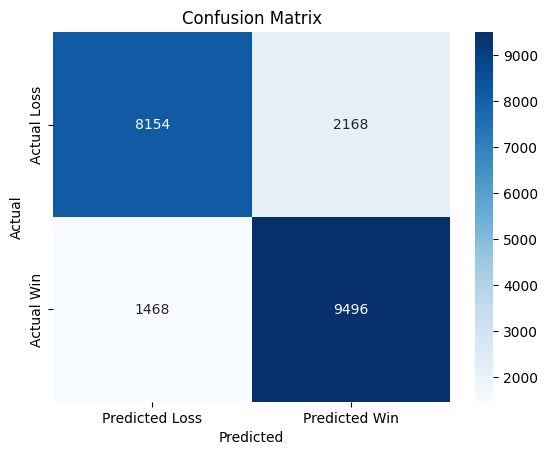

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_reset, binary_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Loss", "Predicted Win"], yticklabels=["Actual Loss", "Actual Win"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [94]:
### XGBOOST

In [95]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [96]:
# Import required libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fine-tuned XGBoost model with optimized hyperparameters
xgb_model = XGBClassifier(
    n_estimators=200,        # Number of boosting rounds
    max_depth=6,             # Maximum depth of trees (higher = more complexity)
    learning_rate=0.05,      # Step size shrinkage
    colsample_bytree=0.8,    # Percentage of features per tree
    subsample=0.8,           # Prevents overfitting by using a fraction of data per iteration
    reg_alpha=0.1,           # L1 regularization (reduces overfitting)
    reg_lambda=0.5,          # L2 regularization (reduces overfitting)
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)
print("✅ XGBoost model training completed with fine-tuning.")

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f"🔹 XGBoost Accuracy: {accuracy:.4f}")
print(f"🔹 XGBoost Precision: {precision:.4f}")
print(f"🔹 XGBoost Recall: {recall:.4f}")
print(f"🔹 XGBoost F1 Score: {f1:.4f}")
print(f"🔹 XGBoost ROC-AUC: {roc_auc:.4f}")





✅ XGBoost model training completed with fine-tuning.
🔹 XGBoost Accuracy: 0.9424
🔹 XGBoost Precision: 0.9359
🔹 XGBoost Recall: 0.9535
🔹 XGBoost F1 Score: 0.9446
🔹 XGBoost ROC-AUC: 0.9421


In [97]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = xgb_model.predict(X_train)
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Display the first 10 predictions
print("First 10 Predictions:", y_pred[:10])


# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"XGBoost Training Accuracy: {train_accuracy:.4f}")
# Predict on test data
y_test_pred = xgb_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Test Accuracy: {test_accuracy:.4f}")



First 10 Predictions: [0 1 0 0 1 1 0 1 1 1]
XGBoost Training Accuracy: 0.9471
XGBoost Test Accuracy: 0.9424


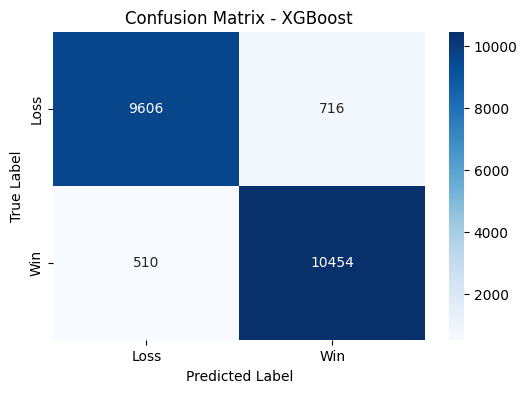

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [99]:
### RANDOM FOREST

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)

# Train on the dataset
rf_model.fit(X_train, y_train)
print("✅ Random Forest training completed!")

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)

print(f"🔹 Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"🔹 Random Forest Precision: {rf_precision:.4f}")
print(f"🔹 Random Forest Recall: {rf_recall:.4f}")
print(f"🔹 Random Forest F1 Score: {rf_f1:.4f}")
print(f"🔹 Random Forest ROC-AUC: {rf_auc:.4f}")

rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = rf_model.score(X_test, y_test)

print(f"✅ Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"✅ Random Forest Test Accuracy: {rf_test_accuracy:.4f}")


print("First 10 Predictions:", rf_predictions[:10])


✅ Random Forest training completed!
🔹 Random Forest Accuracy: 0.9020
🔹 Random Forest Precision: 0.8986
🔹 Random Forest Recall: 0.9128
🔹 Random Forest F1 Score: 0.9057
🔹 Random Forest ROC-AUC: 0.9017
✅ Random Forest Training Accuracy: 0.9092
✅ Random Forest Test Accuracy: 0.9020
First 10 Predictions: [0 1 0 0 1 1 0 1 1 1]


In [101]:
###LOGISTIC REGRESSION

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
log_reg = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_log_reg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Train and Evaluate
y_pred_log = best_log_reg.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_acc = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1])

print(f"🔹 Logistic Regression Accuracy: {log_acc:.4f}")
print(f"🔹 Logistic Regression Precision: {log_precision:.4f}")
print(f"🔹 Logistic Regression Recall: {log_recall:.4f}")
print(f"🔹 Logistic Regression F1 Score: {log_f1:.4f}")
print(f"🔹 Logistic Regression ROC-AUC: {log_auc:.4f}")


y_pred = best_log_reg.predict(X_test)  # Use the fitted model
print("First 10 Predictions:", y_pred[:10])




Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
🔹 Logistic Regression Accuracy: 0.7777
🔹 Logistic Regression Precision: 0.7726
🔹 Logistic Regression Recall: 0.8056
🔹 Logistic Regression F1 Score: 0.7888
🔹 Logistic Regression ROC-AUC: 0.8651
First 10 Predictions: [0 1 0 1 1 1 0 0 1 1]


In [104]:
import joblib

# Save model
joblib.dump(xgb_model, "xgboost_model.pkl")


['xgboost_model.pkl']